<a href="https://colab.research.google.com/github/nachoacev/practice-data-science/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Seaborn

In this hands-on notebook, we'll learn how to take our data visualizations to the next level with `seaborn`, a powerful but easy-to-use data visualization tool.

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexisbcook/data-for-datavis")

print("Path to dataset files:", path)

100%|██████████| 142k/142k [00:00<00:00, 413kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/alexisbcook/data-for-datavis/versions/2


<Axes: xlabel='Date'>

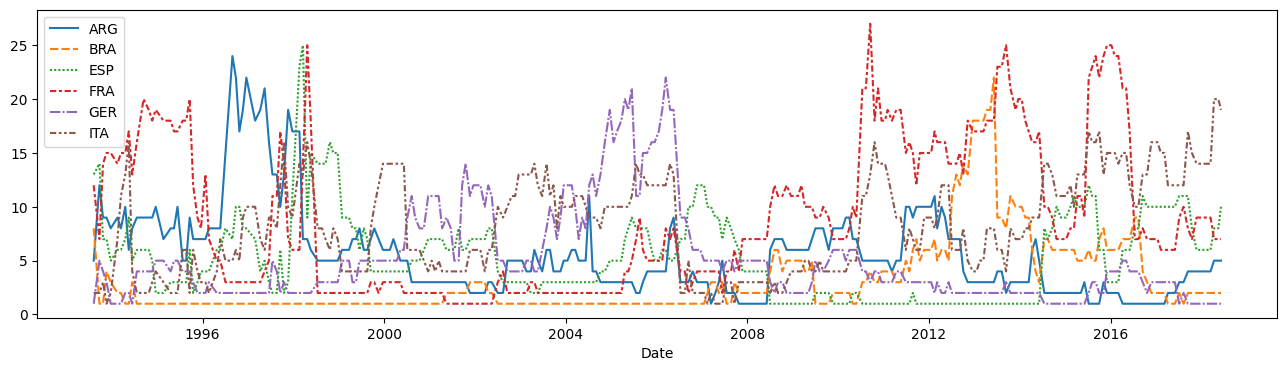

In [3]:
# Path of the file to read
fifa_filepath = path + "/fifa.csv"

# Read the file into a variable fifa_data
fifa_data = pd.read_csv(fifa_filepath, index_col='Date', parse_dates=True)

# Set the width and height of the figure
plt.figure(figsize=(16, 4))

# Line chart showing how FIFA rankings evolved over time
sns.lineplot(data=fifa_data)


# Line Charts

We will create professional looking line charts in `Python`.

In [4]:
# Path of the file to read
spotify_filepath = path + "/spotify.csv"

# Read the file into a variable
spotify_data = pd.read_csv(spotify_filepath, index_col='Date', parse_dates=True)

In [5]:
spotify_data.head()

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2017-01-06,12287078,NaN,NaN,NaN,NaN
2017-01-07,13190270,NaN,NaN,NaN,NaN
2017-01-08,13099919,NaN,NaN,NaN,NaN
2017-01-09,14506351,NaN,NaN,NaN,NaN
2017-01-10,14275628,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Daily Global Streams of Popular Songs in 2017-2018'}, xlabel='Date'>

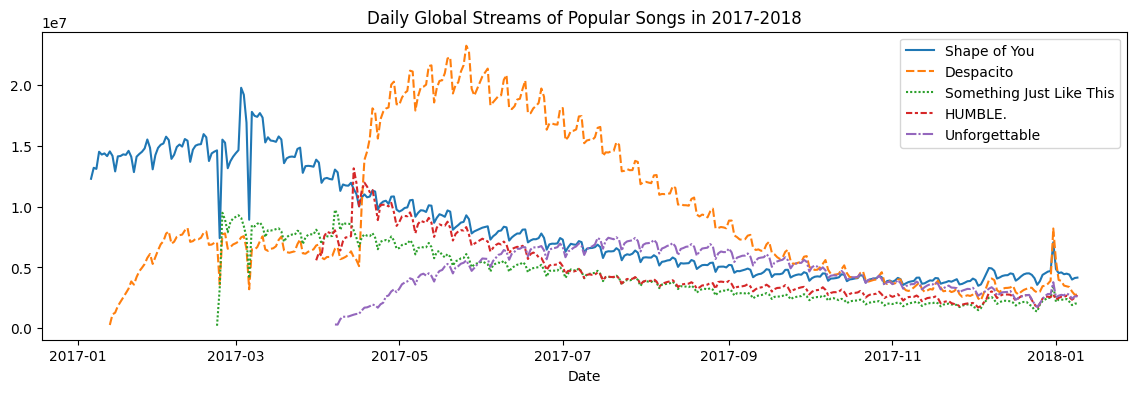

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(14, 4))

# Add title
plt.title('Daily Global Streams of Popular Songs in 2017-2018')

# Line chart showing daily global streams of each song
sns.lineplot(data=spotify_data)

Text(0.5, 0, 'Date')

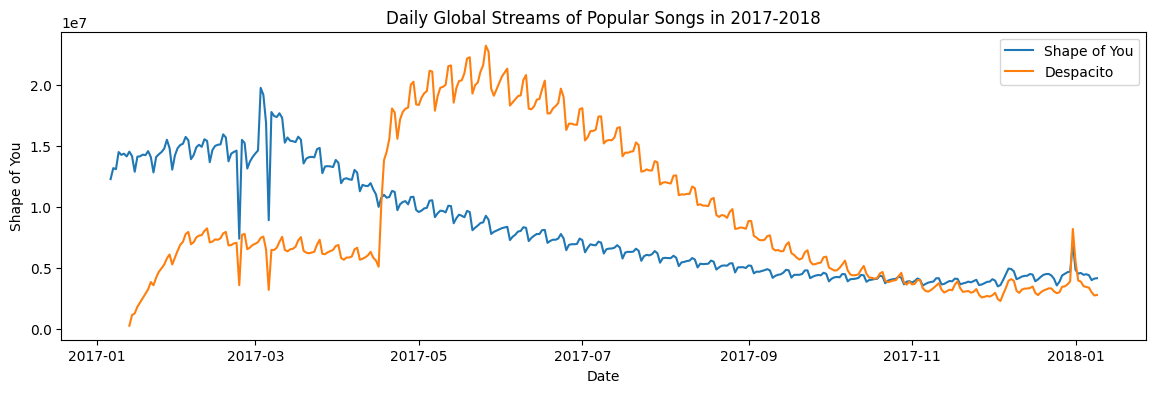

In [7]:
# Set the width and height of the figure
plt.figure(figsize=(14, 4))

# Add title
plt.title('Daily Global Streams of Popular Songs in 2017-2018')

# Line chart showing the daily streams of 'Shape of You'
sns.lineplot(data=spotify_data['Shape of You'], label='Shape of You')

# Line chart showing the daily streams of 'Despacito'
sns.lineplot(data=spotify_data['Despacito'], label='Despacito')

# Add label for horizontal axis
plt.xlabel('Date')


# Bar Charts and Heatmaps

In [8]:
# Path of the file to read
flight_filepath = path + "/flight_delays.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

Text(0, 0.5, 'Arrival delay (min)')

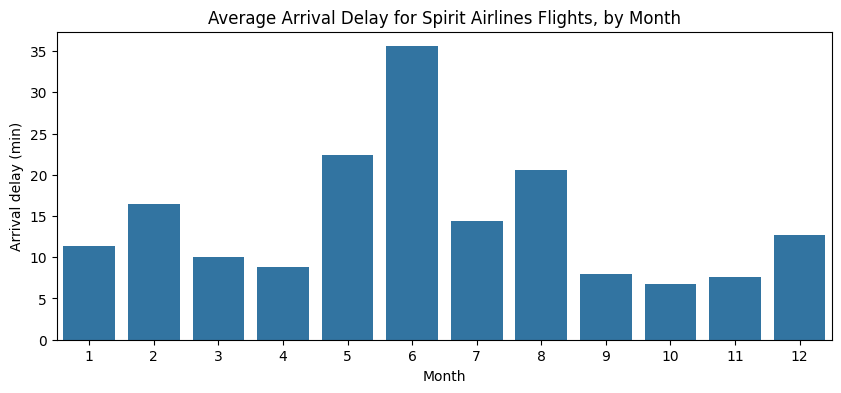

In [9]:
# Set the width and height of the figure
plt.figure(figsize=(10, 4))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay sor Spirit Airlines Flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (min)")

Text(0.5, 47.7222222222222, 'Airline')

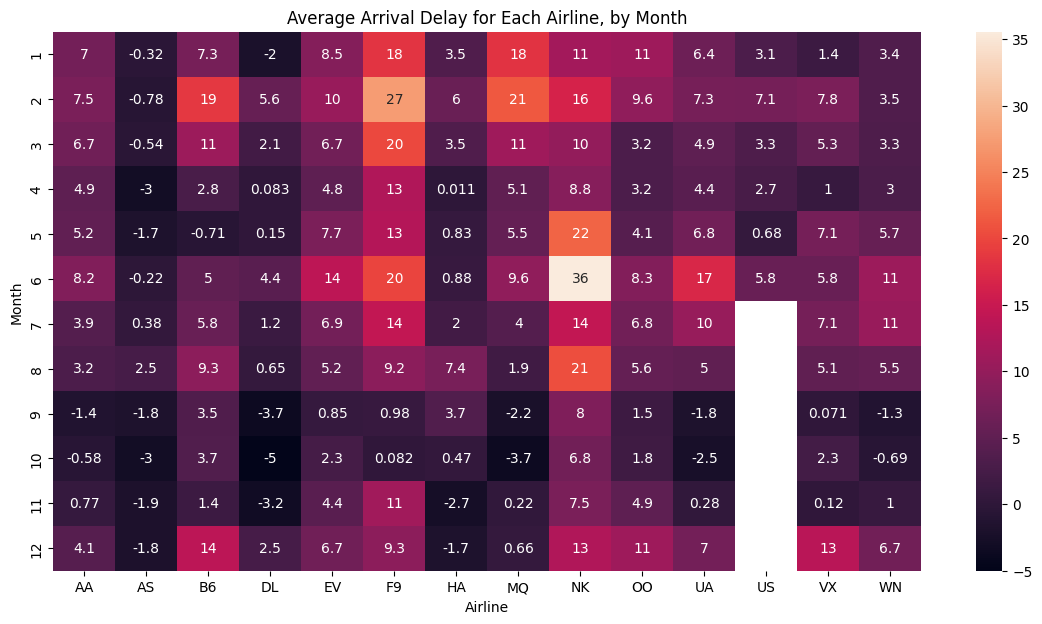

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontala axis
plt.xlabel("Airline")

# Scatter Plots

To create a simple scatter plot, we use the `sns.scatterplot` command and specify the values.

In [12]:
# Path of the file to read
insurance_filepath = path + "/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

In [13]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## `sns.scatterplot()` and `sns.regplot()`

<Axes: xlabel='bmi', ylabel='charges'>

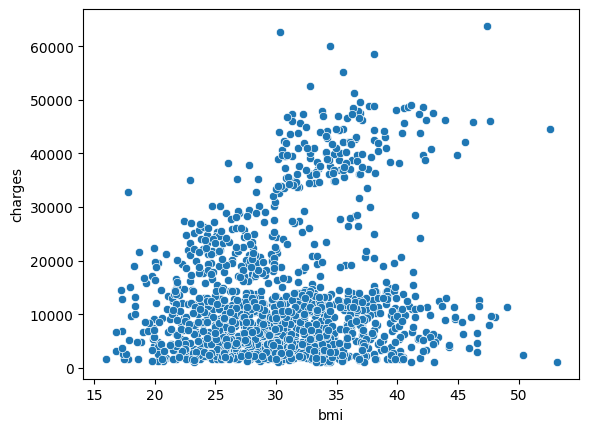

In [14]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that *body mass index* (BMI) and *insurance charges* **are positively correlated**, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, **we might like to add a regression line, or the line that best fits the data**. We do this by changing the command to `sns.regplot`.

<Axes: xlabel='bmi', ylabel='charges'>

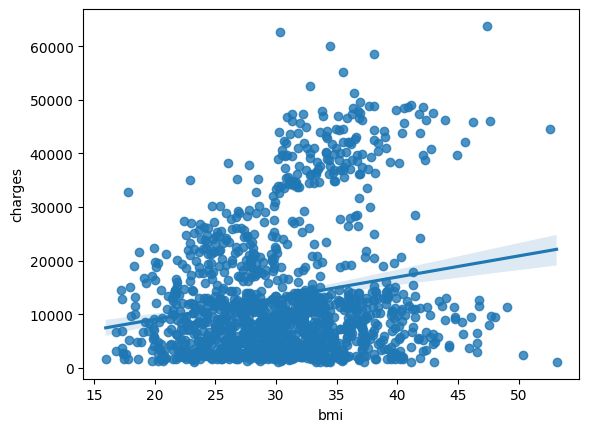

In [15]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

## Color-Coded Scatter Plots `sns.lmplot()`

We can use scatter plots to display the relationships between (not two, but...) three variables. One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, **we can color-code the points** by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.

<Axes: xlabel='bmi', ylabel='charges'>

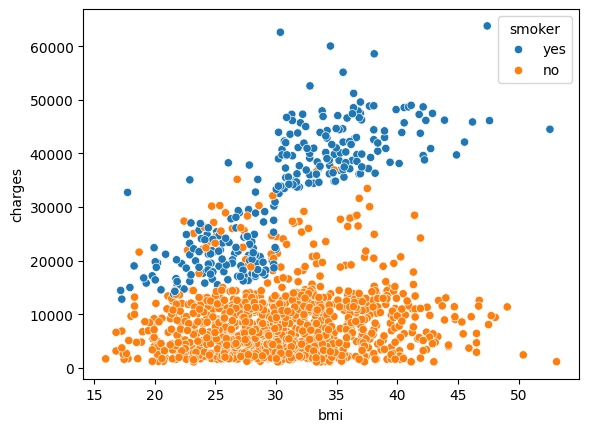

In [16]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, **smokers pay MUCH mor**e.

**To further emphasize this fact, we can use the `sns.lmplot` command to add two regression lines**, corresponding to smokers and nonsmokers. (We'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)

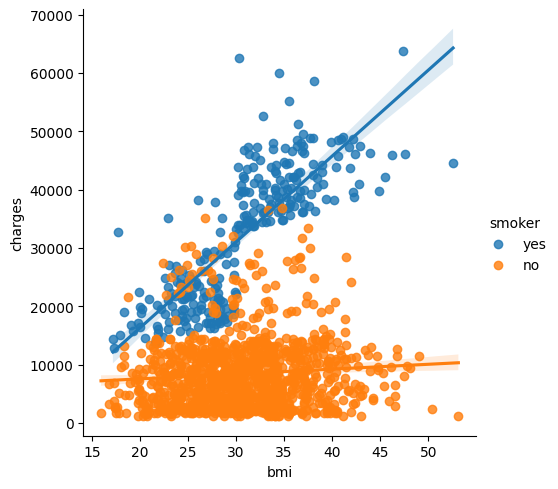

In [19]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_data)

## Categorical Scatter Plot `sns.swarmplot()`

Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges").

However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the `sns.swarmplot` command.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


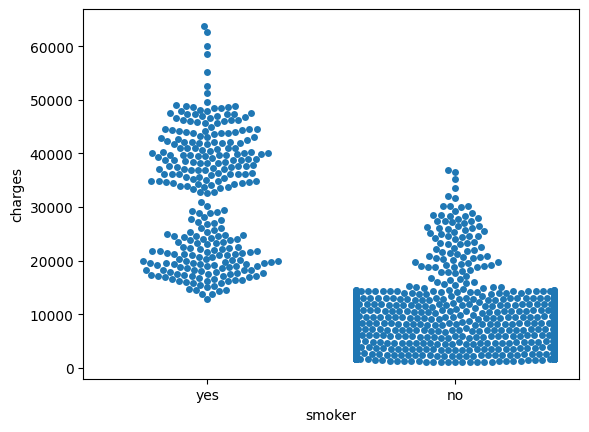

In [20]:
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])